In [8]:
import sys
sys.path.append("../../src")

import numpy as np
from datetime import datetime
from maneuvers import Maneuvers
import constants, auxiliary,coordinates,models
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import copy
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [9]:
# Initial Conditions
ra = [-266.77e3,3865.8e3,5426.2e3]
va = [-6.4836e3,-3.619e3,2.4156e3]
rb = [-5890.7e3,-2979.8e3,1792.2e3]
vb = [0.93583e3,-5.2403e3,-5.5009e3]
coea = coordinates.cart2kep(ra,va)
coeb = coordinates.cart2kep(rb,vb)
startDate = datetime.now()

# Spacecraft
wetMass = 3
propMass = 2.9
area = 10
satellite = models.Spacecraft(wetMass,wetMass-propMass,area)

# Thruster
thrust = 1e-3
isp = 720
satellite.thruster = models.Thruster(thrust=thrust,isp=isp)

# Orbiting Object
orbitingObject = models.Spacecraft(0.1,0.1,1)

# Maneuvers
maneuver = Maneuvers(coea,satellite,startDate)
maneuver2 = Maneuvers(coeb,satellite,startDate)
maneuver.propagate(60*60*90,60,max_step=60);
maneuver2.propagate(60*60*90,60,max_step=60);

Propagating...from day  0.0  to  3.75
The solver successfully reached the end of the integration interval. (Status Code: 0)

Propagating...from day  0.0  to  3.75
The solver successfully reached the end of the integration interval. (Status Code: 0)



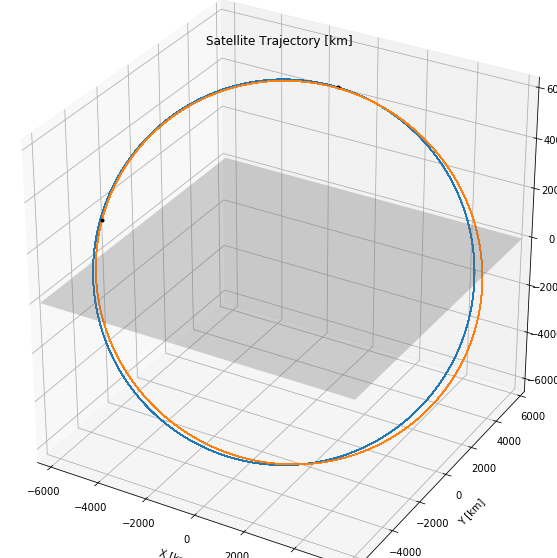

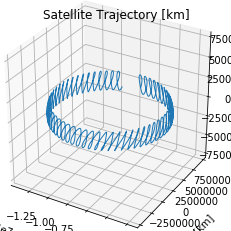

In [10]:
%matplotlib inline
ax = maneuver.plot("3d-trajectory")
maneuver2.plot("3d-trajectory",ax = ax)

rel_r = maneuver2.history.r-maneuver.history.r
rel_r_SC = np.zeros([maneuver.history.r.shape[0],3])
for idx in range(0,maneuver.history.r.shape[0]):
    r = maneuver.history.r[idx,:]
    v = maneuver.history.v[idx,:]
    #RSW frame definition from r and v
    rhat = r/np.linalg.norm(r)
    w = np.cross(rhat,v)
    what = w/np.linalg.norm(w)
    shat = np.cross(what,rhat)
    rsw = [rhat, shat, what]
    rel_r_SC[idx,:] = np.dot(rsw,rel_r[idx,:])
    
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot3D(rel_r_SC[:,0],
          rel_r_SC[:,1],
          rel_r_SC[:,2],linewidth=1)
auxiliary.set_axes_equal(ax)
ax.set_aspect("equal")
scale_x = 1.2
scale_y = 1.2
scale_z = 1.2
ax.get_proj = lambda: np.dot(Axes3D.get_proj(ax), np.diag([scale_x, scale_y, scale_z, 1]))
ax.set_title("Satellite Trajectory [km]")
ax.set_xlabel("X [km]");
ax.set_ylabel("Y [km]");
ax.set_zlabel("Z [km]");